In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# Configurações globais para visualização
pd.options.display.max_columns = 150
pd.options.display.float_format = "{:.2f}".format

# Carregando os dados
data = pd.read_csv('data-final.csv', sep='\t')

# Removendo colunas desnecessárias
data = data.iloc[:, :50]

# Analisando estatísticas básicas dos dados
print("Estatísticas Descritivas dos Dados:")
print(data.describe())

# Verificando contagem de registros por valor em uma coluna específica (EXT1)
print("\nContagem de Registros por Valor em EXT1:")
print(data["EXT1"].value_counts())

# Removendo registros com valores iguais a zero em todas as colunas
data = data[(data > 0).all(axis=1)]

# Exibindo contagem de registros após remoção dos valores iguais a zero em todas as colunas
print("\nContagem de Registros Após Remoção de Zeros:")
print(data["EXT1"].value_counts())

# Determinando o número ideal de clusters usando o método Elbow
# Instalando yellowbrick: !pip install yellowbrick
# Importando as bibliotecas que iremos trabalhar
# Nota: A linha !pip install yellowbrick é desnecessária se você já instalou a biblioteca.



Estatísticas Descritivas dos Dados:
            EXT1       EXT2       EXT3       EXT4       EXT5       EXT6  \
count 1013558.00 1013558.00 1013558.00 1013558.00 1013558.00 1013558.00   
mean        2.65       2.77       3.29       3.14       3.28       2.40   
std         1.26       1.32       1.22       1.24       1.28       1.23   
min         0.00       0.00       0.00       0.00       0.00       0.00   
25%         1.00       2.00       2.00       2.00       2.00       1.00   
50%         3.00       3.00       3.00       3.00       3.00       2.00   
75%         4.00       4.00       4.00       4.00       4.00       3.00   
max         5.00       5.00       5.00       5.00       5.00       5.00   

            EXT7       EXT8       EXT9      EXT10       EST1       EST2  \
count 1013558.00 1013558.00 1013558.00 1013558.00 1013558.00 1013558.00   
mean        2.77       3.41       2.96       3.56       3.29       3.17   
std         1.40       1.27       1.35       1.31       1.35   

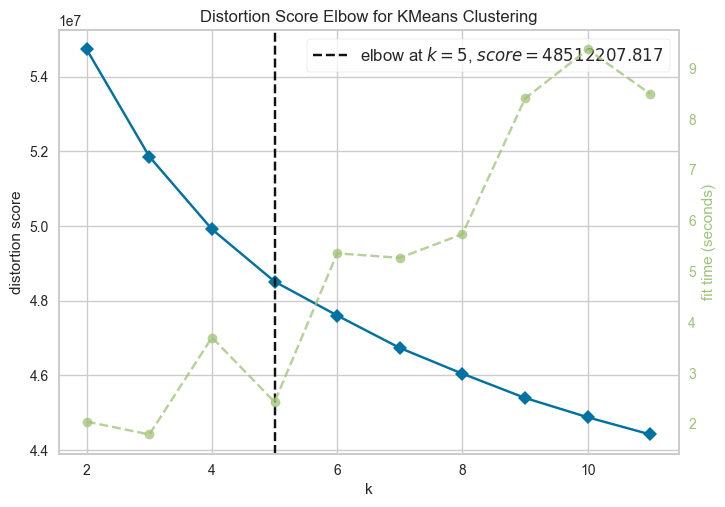

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2]:
# Definindo o modelo KMeans
model = KMeans()

# Visualizando o gráfico Elbow para determinar o número ideal de clusters
visualizer = KElbowVisualizer(model, k=(2,12))
visualizer.fit(data)
visualizer.show()


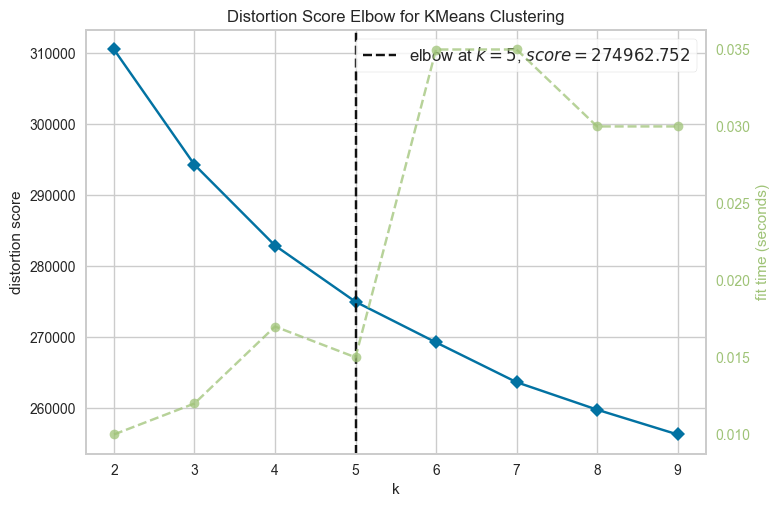


Contagem de Registros por Cluster:
Clusters
4    193701
2    182867
3    181156
0    172088
1    144622
Name: count, dtype: int64

Estatísticas Descritivas dos Grupos:
          EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  EST1  \
Clusters                                                                      
0         1.80  3.63  2.24  4.07  2.30  3.19  1.74  4.09  2.17   4.49  4.29   
1         2.16  3.44  2.79  3.59  2.61  2.86  2.12  3.71  2.71   3.99  2.45   
2         2.15  3.28  3.14  3.64  3.00  2.69  2.24  3.99  2.34   4.11  3.50   
3         3.48  1.94  4.34  2.21  4.28  1.66  3.90  2.80  3.77   2.51  2.31   
4         3.45  1.92  3.80  2.51  4.06  1.82  3.66  2.77  3.77   3.00  3.83   

          EST2  EST3  EST4  EST5  EST6  EST7  EST8  EST9  EST10  AGR1  AGR2  \
Clusters                                                                      
0         2.45  4.53  2.13  3.57  3.90  4.01  3.78  4.01   3.96  2.44  3.39   
1         3.71  3.13  2.99  2.40  2.12  

In [3]:
# Instanciando o método KMeans e o Visualizer.
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10))

# Selecionando uma amostra aleatória dos dados com 5000 observações.
data_sample = data.sample(n=5000, random_state=1) 

# Visualizando o gráfico Elbow na amostra aleatória selecionada
visualizer.fit(data_sample)
visualizer.poof() 

# Instanciando o modelo KMeans com 5 clusters
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(data)

# Inserindo os rótulos dos clusters no dataframe
predictions = k_fit.labels_
data['Clusters'] = predictions

# Exibindo a contagem de registros em cada cluster
print("\nContagem de Registros por Cluster:")
print(data["Clusters"].value_counts())

# Exibindo as estatísticas descritivas dos grupos
print("\nEstatísticas Descritivas dos Grupos:")
print(data.groupby('Clusters').mean())

# Calculando a média de cada grupo de questões para verificar um padrão.
# Selecionando as colunas de cada grupo.
col_list = list(data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]


In [4]:
# Somando os valores de cada grupo
data_soma = pd.DataFrame()
data_soma['extroversion'] = data[ext].sum(axis=1) / 10
data_soma['neurotic'] = data[est].sum(axis=1) / 10
data_soma['agreeable'] = data[agr].sum(axis=1) / 10
data_soma['conscientious'] = data[csn].sum(axis=1) / 10
data_soma['open'] = data[opn].sum(axis=1) / 10
data_soma['clusters'] = predictions

In [5]:

# Exibindo o valor médio por grupo
print("\nMédia por Grupo:")
print(data_soma.groupby('clusters').mean())


Média por Grupo:
          extroversion  neurotic  agreeable  conscientious  open
clusters                                                        
0                 2.97      3.66       3.16           3.18  3.25
1                 3.00      2.63       2.95           3.03  3.26
2                 3.06      2.98       3.19           3.16  3.24
3                 3.09      2.43       3.21           3.11  3.34
4                 3.07      3.43       3.31           3.22  3.37


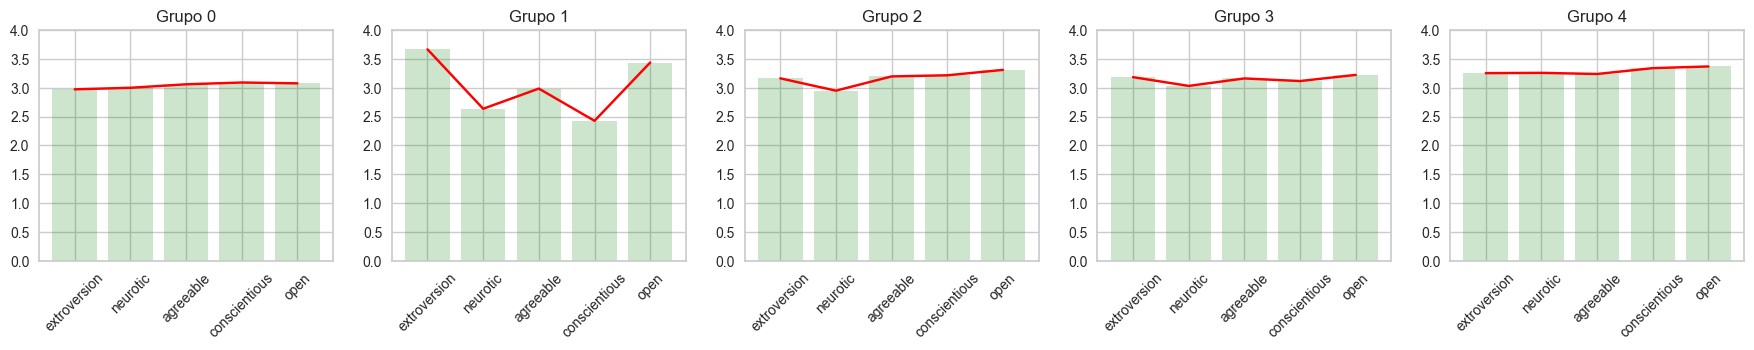

In [6]:

# Visualizando as médias por grupo
data_clusters = data_soma.groupby('clusters').mean()
plt.figure(figsize=(22, 3))
for i in range(0, 5):
    plt.subplot(1, 5, i+1)
    plt.bar(data_clusters.columns, data_clusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(data_clusters.columns, data_clusters.iloc[:, i], color='red')
    plt.title('Grupo ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0, 4)

In [12]:

# Salvando as perguntas em um arquivo Excel para inserir os dados
data[:0].to_excel("perguntas.xlsx", index=False)

In [13]:

# Recuperando os dados inseridos pelo usuário
meus_dados = pd.read_excel('perguntas.xlsx')

In [14]:
# Removendo a coluna 'Clusters' antes de passar os dados para o modelo
meus_dados = meus_dados.drop(columns=['Clusters'])


In [15]:
# Passando os dados inseridos pelo usuário para o modelo
grupo_personalidade = k_fit.predict(meus_dados)[0]
print('Meu grupo de personalidade é:', grupo_personalidade)


Meu grupo de personalidade é: 4


In [16]:

# Instalando a biblioteca Gradio
!pip install gradio==3.43.1

In [19]:
import gradio as gr

# Lendo os dados com as questões
dicio_questions = open("questions.txt").read().split("\n")
questions = [str(q)[str(q).find("\t"):].lstrip() for q in dicio_questions]

# Criando os inputs para as perguntas
inputs_questions = [gr.inputs.Slider(minimum=1, maximum=5, step=1, default=3, label=q) for q in questions]

C:\Users\Daniel\AppData\Local\Temp\ipykernel_10844\2370820561.py:8: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs_questions = [gr.inputs.Slider(minimum=1, maximum=5, step=1, default=3, label=q) for q in questions]
C:\Users\Daniel\AppData\Local\Temp\ipykernel_10844\2370820561.py:8: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs_questions = [gr.inputs.Slider(minimum=1, maximum=5, step=1, default=3, label=q) for q in questions]


In [20]:

# Lendo os dados com as questões
dicio_questions = open("questions.txt").read().split("\n")
questions = [str(q)[str(q).find("\t"):].lstrip() for q in dicio_questions]

In [21]:



# Criando os inputs para as perguntas
inputs_questions = [gr.inputs.Slider(minimum=1, maximum=5, step=1, default=3, label=q) for q in questions]

# Função para prever o grupo de personalidade
def predict(*outputs_questions):
    outputs_questions = np.array(outputs_questions).reshape(1, -1)
    return k_fit.predict(outputs_questions)

# Interface Gradio para o sistema de detecção de traços de personalidade
iface = gr.Interface(
    fn=predict,
    title="Big Five Personality",
    description="Sistema para detecção de traços de personalidade.",
    inputs=inputs_questions,
    outputs="text"
)
iface.launch(share=True)


C:\Users\Daniel\AppData\Local\Temp\ipykernel_10844\2886437270.py:2: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs_questions = [gr.inputs.Slider(minimum=1, maximum=5, step=1, default=3, label=q) for q in questions]
C:\Users\Daniel\AppData\Local\Temp\ipykernel_10844\2886437270.py:2: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs_questions = [gr.inputs.Slider(minimum=1, maximum=5, step=1, default=3, label=q) for q in questions]


Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://0d2bca82dab1a208ef.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


c:\Users\Daniel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\Daniel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
